In [1]:
from google.colab import files
uploaded=files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 63 bytes


In [2]:
!kaggle datasets download -d kmader/food41

Dataset URL: https://www.kaggle.com/datasets/kmader/food41
License(s): copyright-authors
100% 5.29G/5.30G [01:18<00:00, 15.5MB/s]
100% 5.30G/5.30G [01:18<00:00, 72.7MB/s]


In [3]:
from zipfile import ZipFile
file_name = "/content/food41.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [4]:
import os
food_items = os.listdir('/content/images')
print(f'Total food items: {len(food_items)}')
for item in food_items:
    print(item)

Total food items: 101
pad_thai
ravioli
french_onion_soup
seaweed_salad
club_sandwich
red_velvet_cake
gnocchi
sashimi
garlic_bread
chicken_curry
french_fries
lobster_roll_sandwich
filet_mignon
huevos_rancheros
miso_soup
escargots
fried_calamari
paella
french_toast
spaghetti_carbonara
beignets
apple_pie
macaroni_and_cheese
pulled_pork_sandwich
cheese_plate
creme_brulee
takoyaki
bread_pudding
tuna_tartare
crab_cakes
carrot_cake
waffles
spaghetti_bolognese
beef_tartare
grilled_cheese_sandwich
strawberry_shortcake
lobster_bisque
greek_salad
cheesecake
caprese_salad
edamame
grilled_salmon
mussels
ice_cream
peking_duck
eggs_benedict
deviled_eggs
poutine
omelette
prime_rib
ramen
bibimbap
cannoli
foie_gras
pork_chop
hot_and_sour_soup
hummus
gyoza
guacamole
pho
scallops
baklava
chocolate_mousse
oysters
ceviche
hamburger
caesar_salad
chicken_quesadilla
cup_cakes
tiramisu
spring_rolls
fried_rice
bruschetta
beet_salad
hot_dog
nachos
clam_chowder
croque_madame
donuts
onion_rings
chocolate_cake
shrim

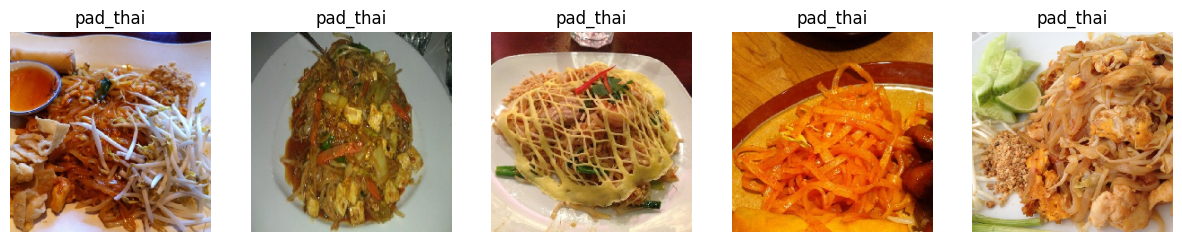

In [5]:
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def display_sample_images(directory, num_images=5):
    food_items = os.listdir(directory)
    sample_images = []

    for food_item in food_items:
        food_item_path = os.path.join(directory, food_item)
        if os.path.isdir(food_item_path):
            images = os.listdir(food_item_path)
            for _ in range(num_images):
                image_path = os.path.join(food_item_path, random.choice(images))
                sample_images.append((food_item, image_path))

    plt.figure(figsize=(15, 15))
    for i, (food_item, image_path) in enumerate(sample_images[:num_images]):
        img = load_img(image_path, target_size=(224, 224))
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.title(food_item)
        plt.axis('off')
    plt.show()

image_directory = '/content/images'
display_sample_images(image_directory)


In [11]:
import os
import requests
from PIL import Image
import numpy as np

def fetch_calorie_info(food_item):
    api_key = 'S9wikG5yKAdspoLjgZSe1Spya2NtzbOTF4qPcSKe'
    url = f'https://api.nal.usda.gov/fdc/v1/foods/search?api_key={api_key}&query={food_item}'

    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if 'foods' in data and data['foods']:
            first_food = data['foods'][0]
            if 'foodNutrients' in first_food:
                for nutrient in first_food['foodNutrients']:
                    if nutrient['nutrientName'] == 'Energy' and nutrient['unitName'] == 'KCAL':
                        return nutrient['value']
    return None


food_items = [
    "club sandwich", "churros", "bibimbap", "apple pie", "croque madame",
    "spaghetti bolognese", "miso soup", "chocolate mousse", "chicken quesadilla",
    "beef carpaccio", "chicken curry", "clam chowder", "gyoza", "omelette",
    "french fries", "ramen", "beet salad", "grilled cheese sandwich", "carrot cake",
    "frozen yogurt", "ceviche", "gnocchi", "french onion soup", "oysters",
    "foie gras", "chocolate cake", "greek salad", "macaroni and cheese", "poutine",
    "scallops", "steak", "hamburger", "mussels", "pulled pork sandwich", "paella",
    "macarons", "crab cakes", "shrimp and grits", "falafel", "pancakes", "nachos",
    "caesar salad", "creme brulee", "escargots", "waffles", "tiramisu",
    "lobster roll sandwich", "sushi", "bruschetta", "lobster bisque", "fried rice",
    "guacamole", "ravioli", "huevos rancheros", "pad thai", "ice cream", "sashimi",
    "red velvet cake", "hot and sour soup", "donuts", "bread pudding", "grilled salmon",
    "baklava", "cannoli", "spring rolls", "cheesecake", "pho", "filet mignon",
    "spaghetti carbonara", "fried calamari", "fish and chips", "beignets", "tacos",
    "seaweed salad", "beef tartare", "edamame", "onion rings", "baby back ribs",
    "french toast", "takoyaki", "cheese plate", "cup cakes", "samosa", "peking duck",
    "pork chop", "prime rib", "breakfast burrito", "garlic bread", "lasagna",
    "deviled eggs", "strawberry shortcake", "pizza", "panna cotta", "risotto",
    "chicken wings", "eggs benedict", "dumplings", "hummus", "caprese salad",
    "hot dog", "tuna tartare"
]

calorie_values = {}

for food_item in food_items:
    calorie_value = fetch_calorie_info(food_item)
    if calorie_value:
        calorie_values[food_item] = calorie_value
    else:
        calorie_values[food_item] = "Calorie information not available"

for food_item, calorie_value in calorie_values.items():
    print(f'"{food_item}": {calorie_value} kcal')

"club sandwich": 220 kcal
"churros": 419 kcal
"bibimbap": 81.0 kcal
"apple pie": 300 kcal
"croque madame": 375 kcal
"spaghetti bolognese": 112 kcal
"miso soup": 26.0 kcal
"chocolate mousse": 269 kcal
"chicken quesadilla": 239 kcal
"beef carpaccio": 600 kcal
"chicken curry": 106 kcal
"clam chowder": 118 kcal
"gyoza": 133 kcal
"omelette": 56.0 kcal
"french fries": 179 kcal
"ramen": 327 kcal
"beet salad": 93.0 kcal
"grilled cheese sandwich": 288 kcal
"carrot cake": 519 kcal
"frozen yogurt": 177 kcal
"ceviche": 63.0 kcal
"gnocchi": 150 kcal
"french onion soup": 70.0 kcal
"oysters": 188 kcal
"foie gras": 357 kcal
"chocolate cake": 439 kcal
"greek salad": 66.0 kcal
"macaroni and cheese": 110 kcal
"poutine": 379 kcal
"scallops": 89.0 kcal
"steak": 556 kcal
"hamburger": 256 kcal
"mussels": 109 kcal
"pulled pork sandwich": 168 kcal
"paella": 422 kcal
"macarons": 467 kcal
"crab cakes": 239 kcal
"shrimp and grits": 126 kcal
"falafel": 514 kcal
"pancakes": 274 kcal
"nachos": 241 kcal
"caesar salad

In [14]:
import os
image_directory = '/content/images'
image_paths = []
labels = []
for food_item in os.listdir(image_directory):
    food_item_path = os.path.join(image_directory, food_item)
    if os.path.isdir(food_item_path) and food_item in calorie_values:
        images = os.listdir(food_item_path)
        for image in images:
            image_path = os.path.join(food_item_path, image)
            image_paths.append(image_path)
            labels.append(calorie_values[food_item])

for i in range(min(5, len(image_paths))):
    print(f"Image Path: {image_paths[i]}, Calorie Value: {labels[i]}")


Image Path: /content/images/ravioli/1199174.jpg, Calorie Value: 213
Image Path: /content/images/ravioli/1069696.jpg, Calorie Value: 213
Image Path: /content/images/ravioli/2244719.jpg, Calorie Value: 213
Image Path: /content/images/ravioli/400086.jpg, Calorie Value: 213
Image Path: /content/images/ravioli/2498686.jpg, Calorie Value: 213


In [15]:
print("Sample Food Items and Calorie Values:")
for food_item, calorie_value in list(calorie_values.items())[:10]:
    print(f"{food_item}: {calorie_value} kcal")

Sample Food Items and Calorie Values:
club sandwich: 220 kcal
churros: 419 kcal
bibimbap: 81.0 kcal
apple pie: 300 kcal
croque madame: 375 kcal
spaghetti bolognese: 112 kcal
miso soup: 26.0 kcal
chocolate mousse: 269 kcal
chicken quesadilla: 239 kcal
beef carpaccio: 600 kcal


In [19]:
def display_sample_images_with_labels(image_paths, labels, num_images=5):
    sample_indices = random.sample(range(len(image_paths)), num_images)
    plt.figure(figsize=(15, 15))
    for i, idx in enumerate(sample_indices):
        image_path = image_paths[idx]
        label = labels[idx]
        img = load_img(image_path, target_size=(224, 224))
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f"Calories: {label} kcal")
        plt.axis('off')
    plt.show()

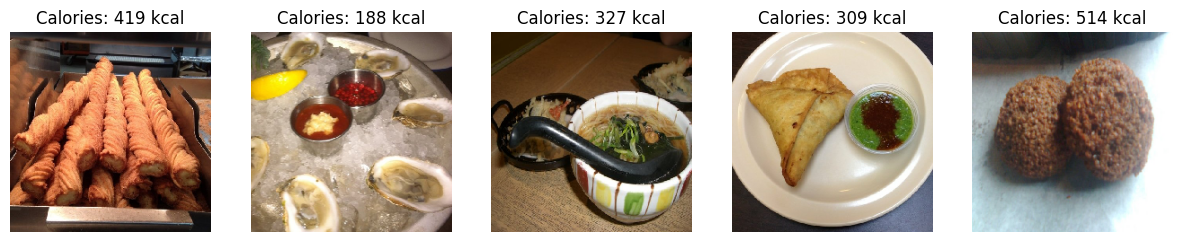

In [20]:
display_sample_images_with_labels(image_paths, labels)

In [23]:
import os
import shutil
import numpy as np
from random import shuffle
import glob

def split_data(source_dir, train_dir, val_dir, test_dir, train_ratio, val_ratio, test_ratio):
    for class_folder in os.listdir(source_dir):
        class_images = glob.glob(os.path.join(source_dir, class_folder, '*.jpg'))
        shuffle(class_images)

        train_split = int(train_ratio * len(class_images))
        val_split = int(val_ratio * len(class_images)) + train_split

        for i, img_path in enumerate(class_images):
            img_name = os.path.basename(img_path)
            if i < train_split:
                dest_path = os.path.join(train_dir, class_folder, img_name)
            elif i < val_split:
                dest_path = os.path.join(val_dir, class_folder, img_name)
            else:
                dest_path = os.path.join(test_dir, class_folder, img_name)

            os.makedirs(os.path.dirname(dest_path), exist_ok=True)
            shutil.copy(img_path, dest_path)

images_directory = '/content/images'
train_dir = '/content/train_directory'
val_dir = '/content/val_directory'
test_dir = '/content/test_directory'

train_ratio = 0.7
val_ratio = 0.1
test_ratio = 0.2

split_data(images_directory, train_dir, val_dir, test_dir, train_ratio, val_ratio, test_ratio)

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

datagen_val = ImageDataGenerator(rescale=1./255)

batch_size = 128
image_size = (224, 224)
train_generator = datagen_train.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = datagen_val.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

num_classes = len(train_generator.class_indices)

Found 86727 images belonging to 101 classes.
Found 22859 images belonging to 101 classes.


In [28]:
num_classes

101

In [25]:
import os
train_dir = '/content/train_directory'
val_dir = '/content/val_directory'
test_dir = '/content/test_directory'

train_classes = os.listdir(train_dir)
val_classes = os.listdir(val_dir)
test_classes = os.listdir(test_dir)

print(f"Number of classes in train directory: {len(train_classes)}")
print(f"Number of classes in validation directory: {len(val_classes)}")
print(f"Number of classes in test directory: {len(test_classes)}")

Number of classes in train directory: 101
Number of classes in validation directory: 101
Number of classes in test directory: 101


In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 batch_normalization_4 (Bat  (None, 222, 222, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 batch_normalization_5 (Bat  (None, 109, 109, 128)     512       
 chNormalization)                                                
                                                      

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10
)